In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
plt.style.use('thomas')
import pandas as pd

In [2]:
plt.style.use('thomas')

<h3>maps</h3>

In [3]:
data_dir = '/Users/thomassiegert/MEGAlib/MEGAlib/resource/examples/advanced/AllSky/'

In [4]:
filename = 'AllSky_Al26_NormInnerGalaxyDiehl_DIRBE240um.dat'

<h3>pandas dataframe to read in the MEGAlib .dat file</h3>

In [5]:
df = pd.read_csv(data_dir+filename,skiprows=1,header=None)

<h3>angles definition (not used further)</h3>

In [6]:
PA_edges = np.array(df[0][0].split(' ')[1:]).astype(float)

In [7]:
TA_edges = np.array(df[0][1].split(' ')[1:]).astype(float)

In [8]:
PA_edges.shape,TA_edges.shape

((361,), (182,))

<h3>instead looked up in the file what the definition of the pixels is</h3>

In [9]:
binsize = 1
l_arrg = np.linspace(-180,180,int(360/binsize)+1)
b_arrg = np.linspace(-90,90,int(180/binsize)+1)
L_ARRg, B_ARRg = np.meshgrid(l_arrg,b_arrg)
l_arr = l_arrg[0:-1]+binsize/2
b_arr = b_arrg[0:-1]+binsize/2
L_ARR, B_ARR = np.meshgrid(l_arr,b_arr)
domega = (binsize*np.pi/180)*(np.sin(np.deg2rad(B_ARR+binsize/2)) - np.sin(np.deg2rad(B_ARR-binsize/2)))

<h3>cross check integration in spherical coordinates</h3>

In [10]:
np.sum(domega)/(4*np.pi)

1.0000000000000002

<h3>energy bin size definition</h3>

In [11]:
dE = np.diff(np.array(df[0][2].split(' ')[1:]).astype(float))[0]
dE # keV

0.0009999999999763531

<h3>pixel values at positions</h3>

In [12]:
df[0][3].split(' ')

['AP', '0', '0', '1', '0.00291464']

<h3>filling a 3D array with that content</h3>

In [13]:
img_arr = np.zeros((360,180))

In [14]:
for i in range(3,64803): # rows looked up in file
    pa_idx, ta_idx, erg_idx, val = np.array(df[0][i].split(' ')[1:]).astype(float)
    #print(pa_idx,ta_idx,val)
    img_arr[int(pa_idx),int(ta_idx)] = val

<h3>plot in mercator (left) and aitoff (right)</h3>

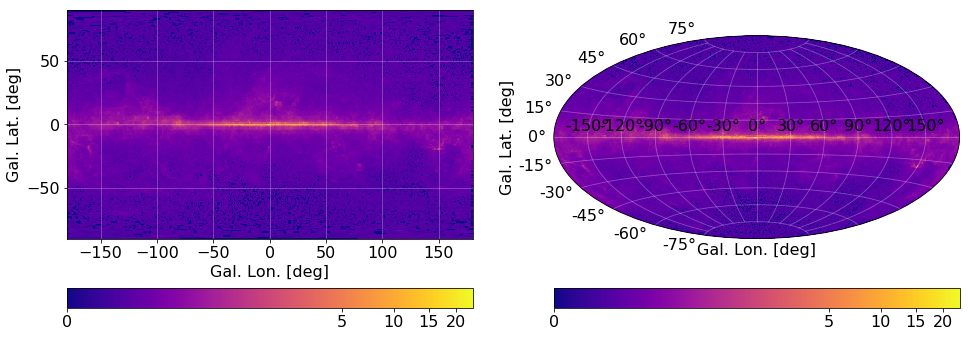

In [15]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.pcolormesh(L_ARRg,B_ARRg, # coordinate grid
               img_arr.T,     # image
               norm=colors.PowerNorm(0.25), # fourth root scaling of the image
               cmap=plt.cm.plasma)          # other color map
plt.xlabel('Gal. Lon. [deg]')
plt.ylabel('Gal. Lat. [deg]')
plt.grid(color='white',alpha=0.3)
plt.colorbar(orientation='horizontal')

plt.subplot(122,projection='aitoff')
deg2rad = np.pi/180
plt.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,
               img_arr.T,
               norm=colors.PowerNorm(0.25),
               cmap=plt.cm.plasma)
plt.xlabel('Gal. Lon. [deg]')
plt.ylabel('Gal. Lat. [deg]')
plt.grid(color='white',alpha=0.3)
plt.colorbar(orientation='horizontal')

<h3>flux in map</h3>

In [16]:
np.sum(img_arr.T*domega)*dE # ph/cm2/s

0.001155004040502822

<h3>cross check for inner galaxy</h3>

In [17]:
IG = np.where((L_ARR >= -30) & (L_ARR <= 30) & (B_ARR >= -10) & (B_ARR <= 10))

In [18]:
np.sum(img_arr[IG[1],IG[0]].T*domega[IG[0],IG[1]])*dE # ph/cm2/s
# true value 3.3e-4

0.0003299999737748915